### libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

### explore dataset

In [3]:
df1 = pd.read_excel("a1_FlightFare_Dataset.xlsx")
print("Shape of df1:", df1.shape)

Shape of df1: (10001, 11)


In [4]:
print(df1.head(5))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [5]:
print(df1.tail())


                 Airline Date_of_Journey    Source Destination  \
9996   Multiple carriers      27/06/2019     Delhi      Cochin   
9997         Jet Airways       6/05/2019   Kolkata    Banglore   
9998           Air India      12/05/2019  Banglore       Delhi   
9999              IndiGo      24/04/2019  Banglore       Delhi   
10000  Multiple carriers      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
9996   DEL → IDR → BOM → COK    15:05  01:30 28 Jun  10h 25m     2 stops   
9997         CCU → BOM → BLR    06:30         18:15  11h 45m      1 stop   
9998               BLR → DEL    13:20         16:10   2h 50m    non-stop   
9999               BLR → DEL    22:10  01:00 25 Apr   2h 50m    non-stop   
10000        DEL → BOM → COK    07:30         21:00  13h 30m      1 stop   

                   Additional_Info  Price  
9996                       No info  15965  
9997   In-flight meal not included  10844  
9998          

In [6]:
print(df1.isnull().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [7]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB
None


In [8]:
print(df1.describe())


              Price
count  10001.000000
mean    9087.542346
std     4591.173973
min     1759.000000
25%     5276.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [9]:
print("Unique Airlines:", df1["Airline"].unique())
for col in df1:
    print(f"Number of unique {col}s -->> {df1[col].nunique()}")


Unique Airlines: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Number of unique Airlines -->> 12
Number of unique Date_of_Journeys -->> 44
Number of unique Sources -->> 5
Number of unique Destinations -->> 6
Number of unique Routes -->> 128
Number of unique Dep_Times -->> 220
Number of unique Arrival_Times -->> 1301
Number of unique Durations -->> 364
Number of unique Total_Stopss -->> 5
Number of unique Additional_Infos -->> 9
Number of unique Prices -->> 1814


In [10]:
for col in df1:
    print(df1[col].value_counts())

Jet Airways                          3598
IndiGo                               1927
Air India                            1634
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
6/06/2019     475
18/05/2019    470
9/06/2019     468
21/05/2019    463
12/06/2019    455
9/05/2019     447
21/03/2019    398
15/05/2019    382
27/05/2019    361
24/06/2019    336
27/06/2019    333
1/06/2019     325
3/06/2019     308
15/06/2019    302
24/03/2019    295
6/03/2019     292
27/03/2019    280
24/05/2019    272
6/05/2019     270
1/05/2019     258
1/04/2019     245
12/05/2019    239
3/03/2019     204
9/03/2019     187
15/03/2019    152
18/03/2019    145


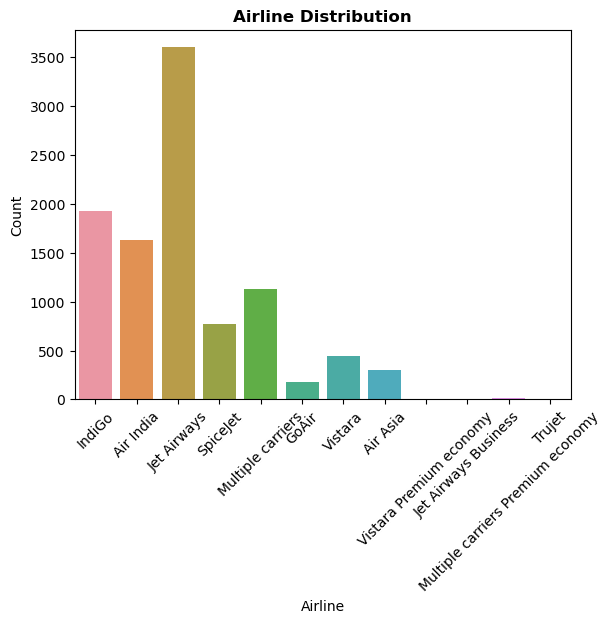

In [11]:
sns.countplot(x="Airline", data=df1)
plt.title("Airline Distribution", fontweight="bold")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

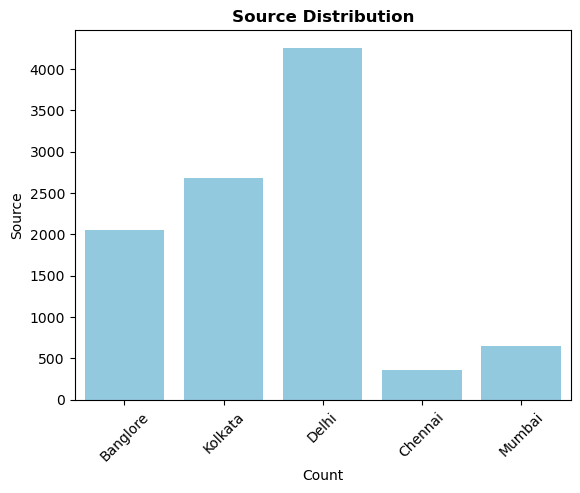

In [12]:
sns.countplot(x="Source", data=df1, color="skyblue")
plt.title("Source Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.xticks(rotation=45)
plt.show()

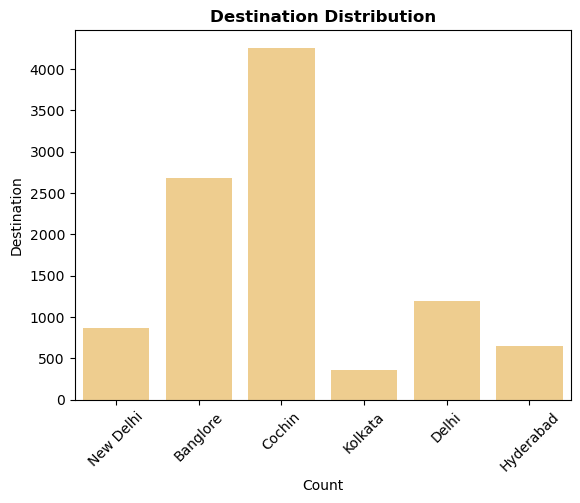

In [13]:
sns.countplot(x=df1["Destination"], color="orange", alpha=0.5)
plt.title("Destination Distribution", fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()


Top 10 routes:
 DEL → BOM → COK          2234
BLR → DEL                1452
CCU → BOM → BLR           910
CCU → BLR                 672
BOM → HYD                 573
CCU → DEL → BLR           532
BLR → BOM → DEL           380
MAA → CCU                 360
DEL → HYD → COK           310
DEL → JAI → BOM → COK     220
Name: Route, dtype: int64


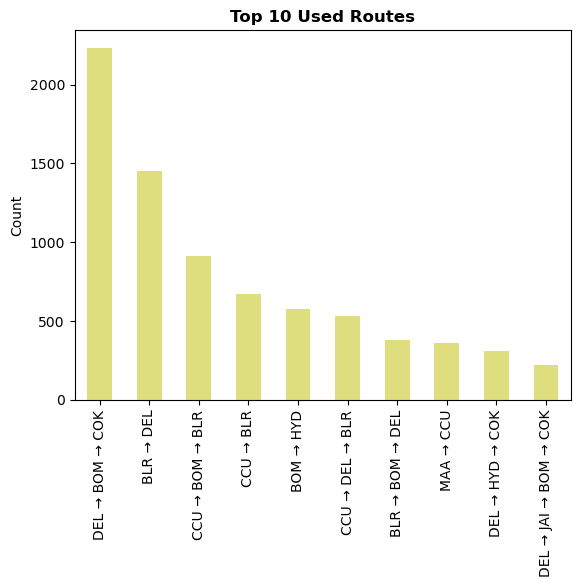

In [14]:
top_routes = df1["Route"].value_counts().sort_values(ascending=False)[:10]
print("Top 10 routes:\n", top_routes)
top_routes.plot(kind="bar", color="y", alpha=0.5)
plt.title("Top 10 Used Routes", fontweight="bold")
plt.ylabel("Count")
plt.show()

In [15]:
bottom_routes = df1["Route"].value_counts().sort_values(ascending=True)[:10]
print("Bottom routes:\n", bottom_routes)

Bottom routes:
 BOM → BBI → HYD                      1
BOM → NDC → HYD                      1
CCU → IXA → BLR                      1
BLR → CCU → BBI → HYD → VGA → DEL    1
BLR → BOM → IXC → DEL                1
BLR → HBX → BOM → NAG → DEL          1
BOM → VNS → DEL → HYD                1
BOM → JAI → DEL → HYD                1
CCU → IXB → DEL → BLR                1
BOM → GOI → HYD                      1
Name: Route, dtype: int64


Total_Stops value counts:
1 stop      5281
non-stop    3259
2 stops     1415
3 stops       44
4 stops        1
Name: Total_Stops, dtype: int64


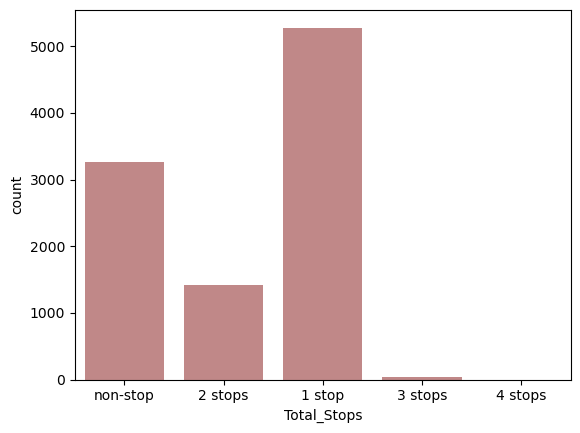

In [16]:
print("Total_Stops value counts:")
print(df1["Total_Stops"].value_counts())
sns.countplot(x=df1["Total_Stops"], color="brown", alpha=0.6)
plt.show()

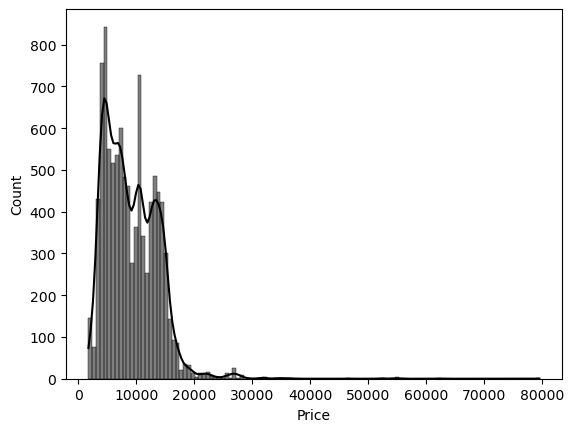

In [17]:
sns.histplot(x=df1["Price"], kde=True, color="black")
plt.show()


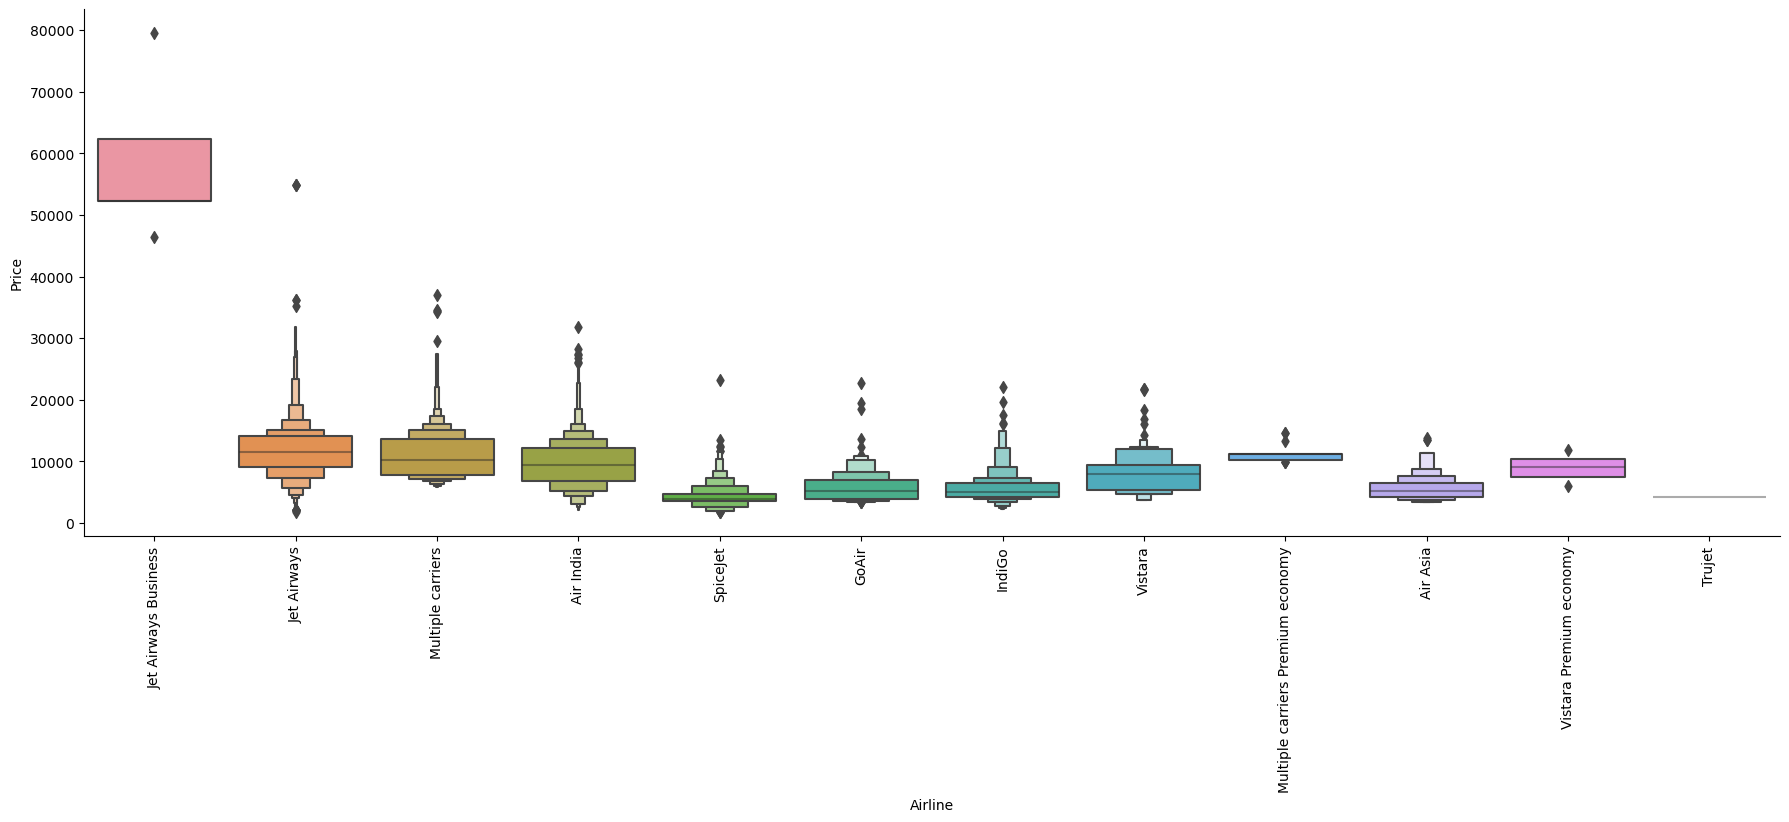

In [18]:
sns.catplot(x="Airline", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", height=6, aspect=3)
plt.xticks(rotation=90)
plt.show()

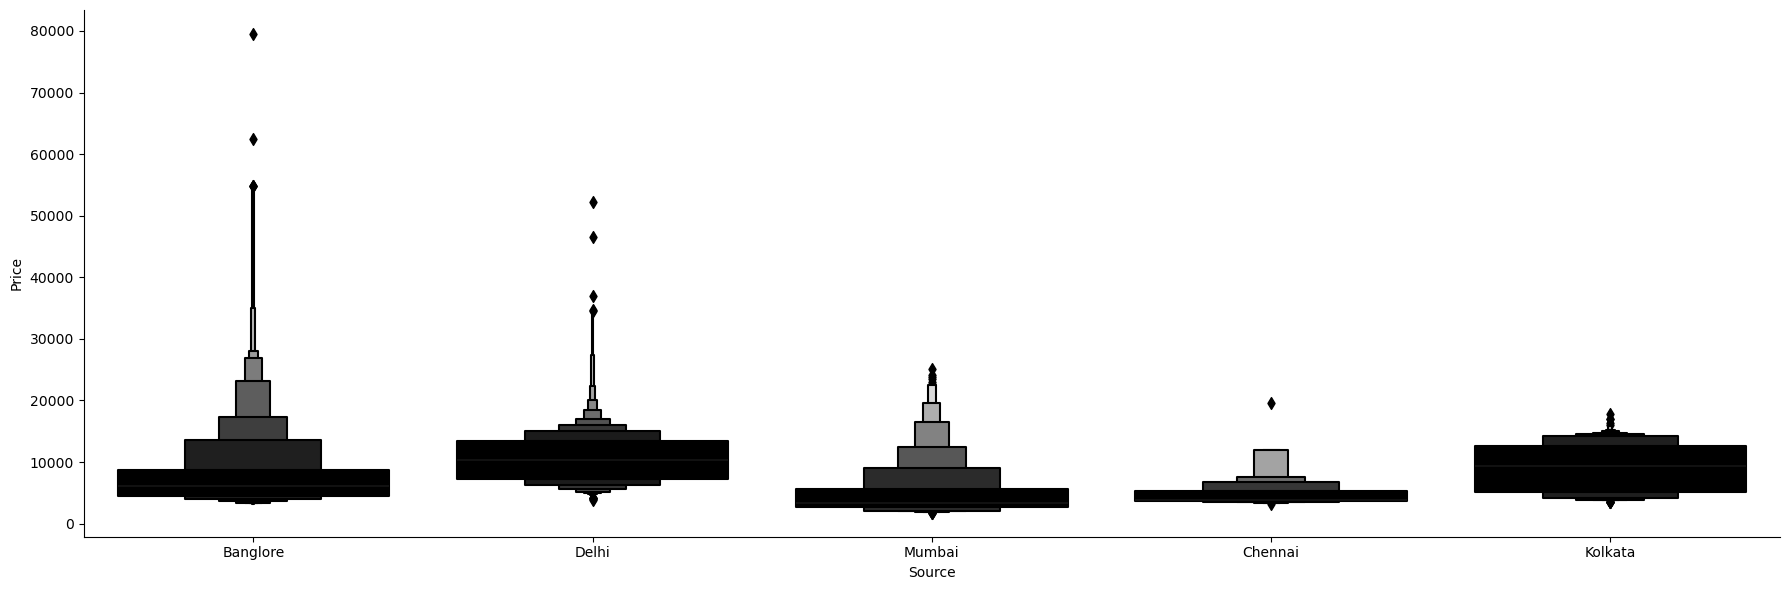

In [19]:
sns.catplot(x="Source", y="Price", data=df1.sort_values("Price", ascending=False),
            kind="boxen", color="black", height=6, aspect=3)
plt.show()

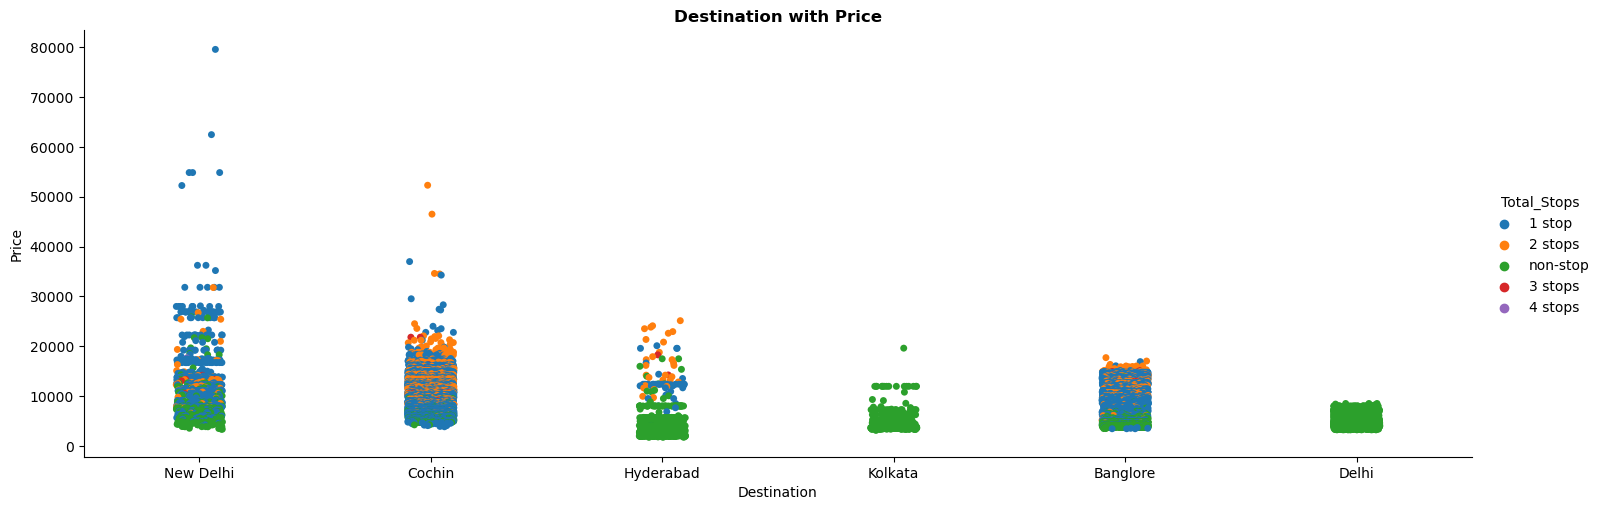

In [20]:
sns.catplot(x="Destination", y="Price", data=df1.sort_values("Price", ascending=False),
            hue="Total_Stops", aspect=3)
plt.title("Destination with Price", fontweight="bold")
plt.show()

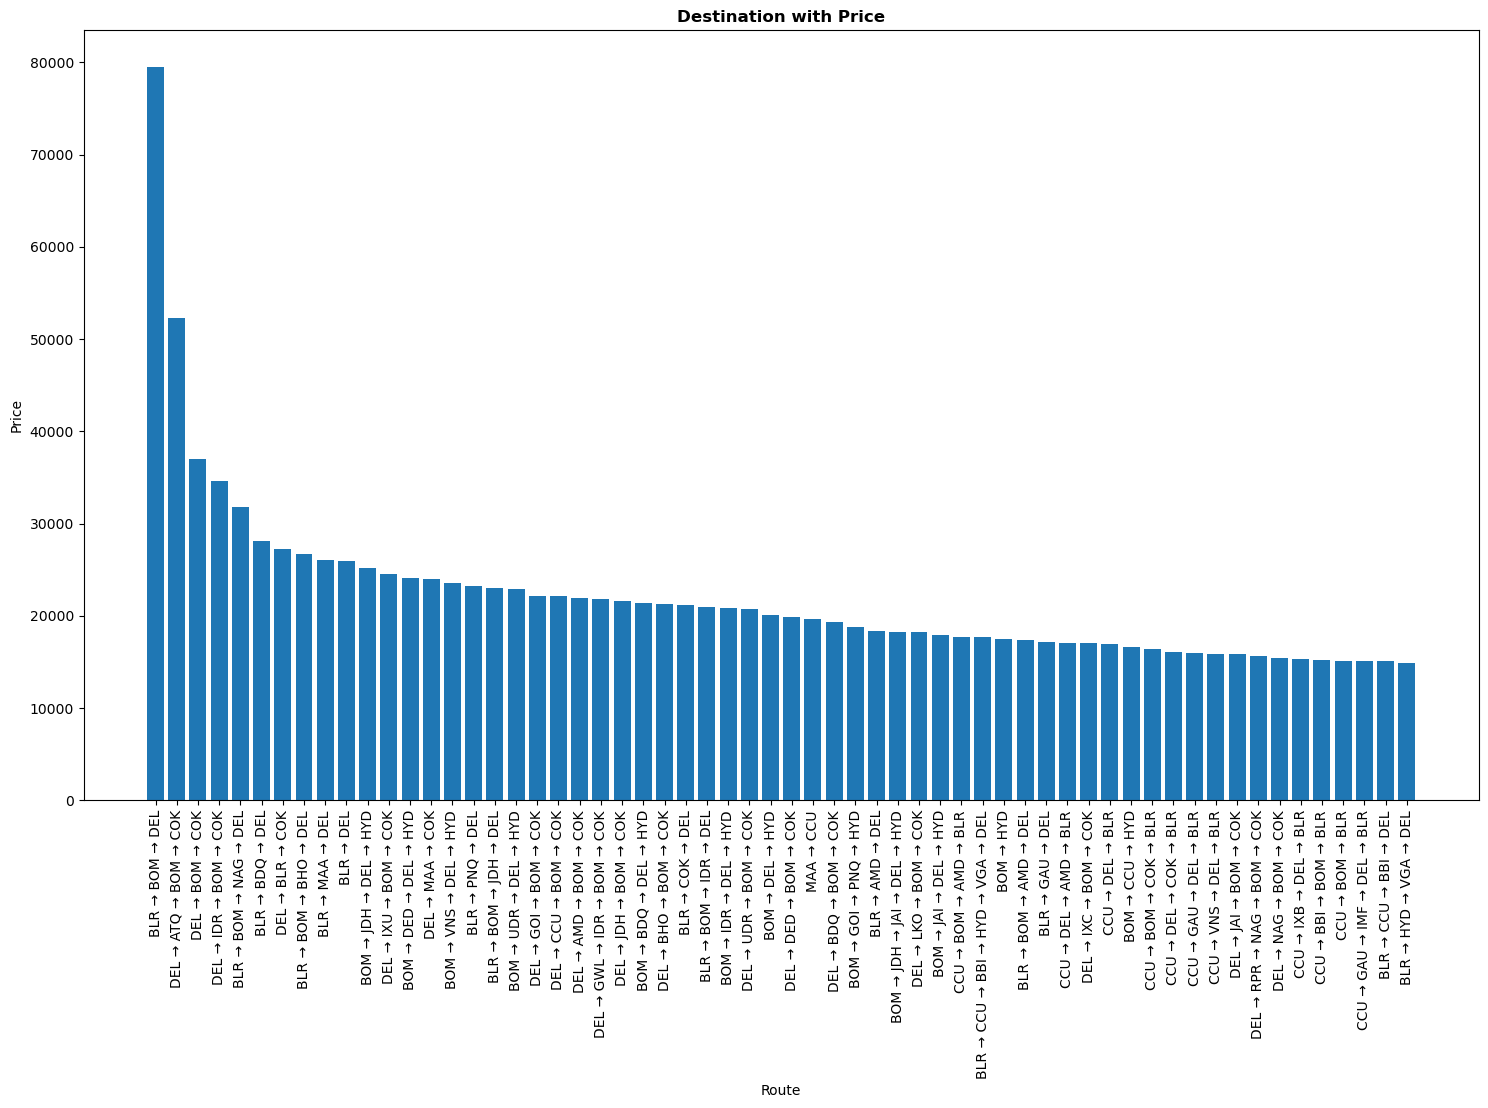

In [21]:
top_1000 = df1.sort_values("Price", ascending=False).head(1000)
plt.figure(figsize=(18, 10))
plt.bar(top_1000["Route"], top_1000["Price"])
plt.title("Destination with Price", fontweight="bold")
plt.xlabel("Route")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

In [22]:
print(df1.info())
print("Unique Date_of_Journey values:", df1["Date_of_Journey"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10001 non-null  object
 1   Date_of_Journey  10001 non-null  object
 2   Source           10001 non-null  object
 3   Destination      10001 non-null  object
 4   Route            10000 non-null  object
 5   Dep_Time         10001 non-null  object
 6   Arrival_Time     10001 non-null  object
 7   Duration         10001 non-null  object
 8   Total_Stops      10000 non-null  object
 9   Additional_Info  10001 non-null  object
 10  Price            10001 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 859.6+ KB
None
Unique Date_of_Journey values: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019

In [23]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"], format="%d/%m/%Y")
df1["Date"] = df1["Date_of_Journey"].dt.day
df1["Month"] = df1["Date_of_Journey"].dt.month
df1["Year"] = df1["Date_of_Journey"].dt.year 
df1.drop("Date_of_Journey", axis=1, inplace=True)

In [24]:

df1["Date"] = df1["Date"].astype(int)
df1["Month"] = df1["Month"].astype(int)
df1["Year"] = df1["Year"].astype(int)

In [25]:
print("Before stops processing:", df1["Total_Stops"].unique())
df1["Total_Stops"].replace(np.nan, "1 stop", inplace=True)
df1["Stops"] = df1["Total_Stops"].replace("non-stop", "1 stop")
df1["Stops"] = df1["Stops"].str.split(" ").str[0]
df1["Stops"] = df1["Stops"].astype(int)
df1.drop("Total_Stops", axis=1, inplace=True)

Before stops processing: ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [26]:
df1.rename(columns={"Stops": "Total_Stops"}, inplace=True)
print(df1.head(4))

       Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   

   Arrival_Time Duration Additional_Info  Price  Date  Month  Year  \
0  01:10 22 Mar   2h 50m         No info   3897    24      3  2019   
1         13:15   7h 25m         No info   7662     1      5  2019   
2  04:25 10 Jun      19h         No info  13882     9      6  2019   
3         23:30   5h 25m         No info   6218    12      5  2019   

   Total_Stops  
0            1  
1            2  
2            2  
3            1  


In [27]:
print("Unique Arrival_Time:", df1["Arrival_Time"].unique())


Unique Arrival_Time: ['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '11:05 10 Apr' '00:40 16 May'
 '01:00 25 Apr']


In [28]:
df1["Arrival_Time"] = df1["Arrival_Time"].str.split(" ").str[0]
df1["Arrival_hour"] = df1["Arrival_Time"].str.split(":").str[0]
df1["Arrival_min"] = df1["Arrival_Time"].str.split(":").str[1]
df1.drop("Arrival_Time", axis=1, inplace=True)
df1["Arrival_hour"] = df1["Arrival_hour"].astype(int)
df1["Arrival_min"] = df1["Arrival_min"].astype(int)
print(df1.head(4))

       Airline    Source Destination                  Route Dep_Time Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   5h 25m   

  Additional_Info  Price  Date  Month  Year  Total_Stops  Arrival_hour  \
0         No info   3897    24      3  2019            1             1   
1         No info   7662     1      5  2019            2            13   
2         No info  13882     9      6  2019            2             4   
3         No info   6218    12      5  2019            1            23   

   Arrival_min  
0           10  
1           15  
2           25  
3           30  


In [29]:
print("Unique Dep_Time:", df1["Dep_Time"].unique())
df1["Dep_hour"] = df1["Dep_Time"].str.split(":").str[0]
df1["Dep_min"] = df1["Dep_Time"].str.split(":").str[1]
df1.drop("Dep_Time", axis=1, inplace=True)
df1["Dep_hour"] = df1["Dep_hour"].astype(int)
df1["Dep_min"] = df1["Dep_min"].astype(int)
print(df1.head(4))

Unique Dep_Time: ['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '

In [30]:
df1["Additional_Info"] = df1["Additional_Info"].replace("No Info", "No info")


In [31]:
print("Columns:", df1.columns)


Columns: Index(['Airline', 'Source', 'Destination', 'Route', 'Duration',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Total_Stops',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')


In [32]:
print("Unique Duration values:", df1["Duration"].unique())


Unique Duration values: ['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 10m' '15h 25m' '14h 5m' '20h 15m' '23h 10m'
 '18h 10m' '16h' '2h 20m' '8h' '16h 55m' '3h 10m' '14h' '23h 50m'
 '21h 40m' '21h 15m' '10h 50m' '8h 15m' '8h 35m' '11h 50m' '27h 35m'
 '8h 25m' '20h 55m' '4h 50m' '8h 10m' '24h 25m' '23h 35m' '2

In [33]:
df1["Duration_hour"] = df1["Duration"].str.split(" ").str[0]
df1["Duration_hour"] = df1["Duration_hour"].str.split("h").str[0]
df1["Duration_min"] = df1["Duration"].str.split(" ").str[1]
df1["Duration_min"] = df1["Duration_min"].str.split("m").str[0]
df1.drop("Duration", axis=1, inplace=True)

In [34]:
df1["Duration_min"] = df1["Duration_min"].replace(np.nan, "0")
df1["Duration_hour"] = df1["Duration_hour"].replace("5m", "5")
df1["Duration_min"] = df1["Duration_min"].astype(int)
df1["Duration_hour"] = df1["Duration_hour"].astype(int)
print("Duration_min unique:", df1["Duration_min"].unique())

Duration_min unique: [50 25  0 45 30  5 15 35 10 20 55 40]


In [35]:
print("Duration_hour unique:", df1["Duration_hour"].unique())


Duration_hour unique: [ 2  7 19  5  4 15 21 25 13 12 26 22 23 20 10  6 11  8 16  3 27  1 14  9
 18 17 24 30 28 29 37 34 38 35 36 47 33 32 31 42 39 41]


In [36]:
print("Unique Routes:", df1["Route"].unique())


Unique Routes: ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU

In [37]:
df1["Route_1"] = df1["Route"].str.split(" → ").str[0]
df1["Route_2"] = df1["Route"].str.split(" → ").str[1]
df1["Route_3"] = df1["Route"].str.split(" → ").str[2]
df1["Route_4"] = df1["Route"].str.split(" → ").str[3]
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]

In [38]:
df1["Route_5"] = df1["Route"].str.split(" → ").str[4]
df1["Route_1"].fillna("None", inplace=True)
df1["Route_2"].fillna("None", inplace=True)
df1["Route_3"].fillna("None", inplace=True)
df1["Route_4"].fillna("None", inplace=True)
df1["Route_5"].fillna("None", inplace=True)

In [39]:
df1.drop("Route", axis=1, inplace=True)


In [40]:

print(df1.head(5))
print(df1.info())
print("Null counts:\n", df1.isnull().sum())

       Airline    Source Destination Additional_Info  Price  Date  Month  \
0       IndiGo  Banglore   New Delhi         No info   3897    24      3   
1    Air India   Kolkata    Banglore         No info   7662     1      5   
2  Jet Airways     Delhi      Cochin         No info  13882     9      6   
3       IndiGo   Kolkata    Banglore         No info   6218    12      5   
4       IndiGo  Banglore   New Delhi         No info  13302     1      3   

   Year  Total_Stops  Arrival_hour  Arrival_min  Dep_hour  Dep_min  \
0  2019            1             1           10        22       20   
1  2019            2            13           15         5       50   
2  2019            2             4           25         9       25   
3  2019            1            23           30        18        5   
4  2019            1            21           35        16       50   

   Duration_hour  Duration_min Route_1 Route_2 Route_3 Route_4 Route_5  
0              2            50     BLR     DEL   

### Model building

In [41]:
df = pd.read_excel("a1_FlightFare_Dataset.xlsx")
df.drop(columns=["Route"], errors="ignore", inplace=True)
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")
df["Date"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month
df["Year"] = df["Date_of_Journey"].dt.year
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [42]:
def extract_time(t):
    # Remove any trailing date part (e.g., "04:25 07 Jun") and keep "HH:MM"
    return t.split()[0].strip()

In [43]:
df["Arrival_Time"] = df["Arrival_Time"].apply(extract_time)
df["Arrival_hour"] = df["Arrival_Time"].apply(lambda x: int(x.split(":")[0]))
df["Arrival_min"] = df["Arrival_Time"].apply(lambda x: int(x.split(":")[1]))
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [44]:
if "Dep_Time" in df.columns:
    df.drop(["Dep_Time"], axis=1, inplace=True) 

In [45]:
def parse_duration(d):
    d = d.lower().strip()
    hours = 0
    mins = 0
    if "h" in d:
        parts = d.split("h")
        hours = int(parts[0])
        if "m" in parts[1]:
            mins = int(parts[1].replace("m", "").strip()) if parts[1] else 0
    elif "m" in d:
        mins = int(d.replace("m", "").strip())
    return hours, mins

In [46]:
df["Duration_hour"], df["Duration_min"] = zip(*df["Duration"].apply(parse_duration))
df.drop(["Duration"], axis=1, inplace=True)

In [47]:
if "Total_Stops" in df.columns:
    df["Total_Stops"] = df["Total_Stops"].str.lower().fillna("0")
    df["Total_Stops"] = df["Total_Stops"].replace("non-stop", "0 stop")
    df["Total_Stops"] = df["Total_Stops"].apply(lambda s: int(s.split()[0]) if "stop" in s else 0)

In [48]:
col_list = [
    "Airline", "Source", "Destination", "Additional_Info",
    "Date", "Month",
    "Total_Stops",
    "Dep_hour", "Dep_min",
    "Arrival_hour", "Arrival_min",
    "Duration_hour", "Duration_min"
]

In [49]:
use_cols = [c for c in col_list if c in df.columns]
X = df[use_cols].copy()
y = df["Price"].copy()

In [50]:
encoders = {}
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].str.strip())
    encoders[col] = le
joblib.dump(encoders, "models/saved_encoders.pkl")
print("Encoders saved successfully (Route excluded).")

Encoders saved successfully (Route excluded).


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
joblib.dump(x_test, "models/x_testing.pkl")
joblib.dump(y_test, "models/y_testing.pkl")
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (7000, 11)
Shape of x_test: (3001, 11)
Shape of y_train: (7000,)
Shape of y_test: (3001,)


In [52]:
model_lasso = SelectFromModel(Lasso(alpha=0.005, max_iter=500, random_state=0))
model_lasso.fit(x_train, y_train)
print("Lasso-chosen columns:", x_train.columns[model_lasso.get_support()])

Lasso-chosen columns: Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Total_Stops', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min'],
      dtype='object')


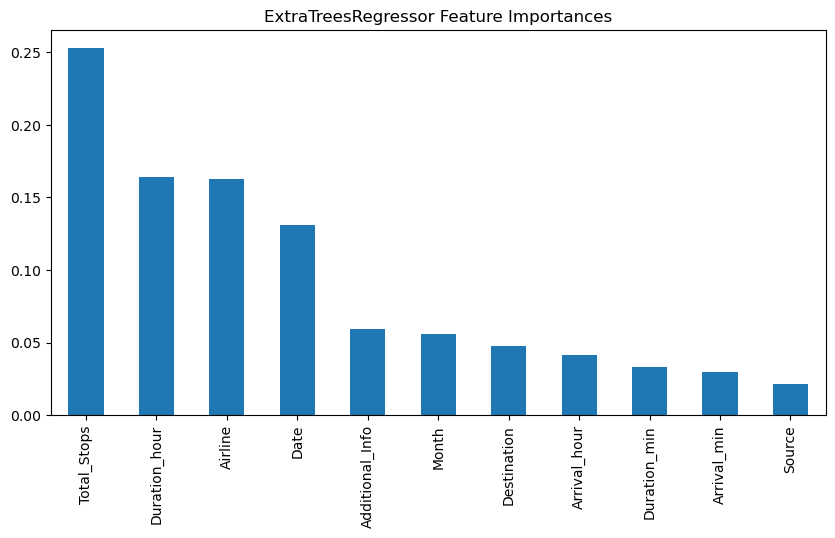

In [53]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
plt.figure(figsize=(10, 5))
feature_imp = pd.Series(etr.feature_importances_, index=x_train.columns)
feature_imp.nlargest(len(x_train.columns)).plot(kind="bar")
plt.title("ExtraTreesRegressor Feature Importances")
plt.show()

In [54]:
def evaluate_model(clf, x_tr, y_tr, x_te, y_te):
    clf.fit(x_tr, y_tr)
    preds = clf.predict(x_te)
    r2 = r2_score(y_te, preds)
    mae = mean_absolute_error(y_te, preds)
    mse = mean_squared_error(y_te, preds)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [55]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

In [56]:
results = {}
for name, reg in models.items():
    r2, mae, mse, rmse = evaluate_model(reg, x_train, y_train, x_test, y_test)
    results[name] = {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

In [57]:
results_df = pd.DataFrame.from_dict(results, orient="index")
print("\nComparison of models:\n", results_df)



Comparison of models:
                         R2          MAE           MSE         RMSE
RandomForest      0.882984   682.116108  2.265150e+06  1505.041400
GradientBoosting  0.832523  1235.599210  3.241945e+06  1800.540215
DecisionTree      0.838539   759.244918  3.125485e+06  1767.904243
SVR               0.015741  3489.377080  1.905287e+07  4364.959169


In [58]:
best_model_name = max(results, key=lambda nm: results[nm]["R2"])
best_model = models[best_model_name]
best_model.fit(x_train, y_train)
joblib.dump(best_model, "models/best_ml_model.pkl")
print(f"\n'{best_model_name}' is the best model, saved to 'models/best_ml_model.pkl'.")


'RandomForest' is the best model, saved to 'models/best_ml_model.pkl'.
